# DNN (3주차)

SEOYEON CHOI  
2022-09-21

기계학습 특강 (3주차) 9월21일 \[회귀분석, 선형모형, 손실함수,
경사하강법\]

## imports

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt 

## 로드맵

`-` 회귀분석 $\to$ 로지스틱 $\to$ 심층신경망(DNN) $\to$
합성곱신경망(CNN)

`-`
[강의계획서](https://github.com/guebin/DL2022/blob/master/_notebooks/DL2022.pdf)

## ref

`-` 넘파이 문법이 약하다면? (reshape, concatenate, stack)

1.  reshape: 아래 링크의 넘파이공부 2단계 reshape 참고

https://guebin.github.io/IP2022/2022/04/06/(6%EC%A3%BC%EC%B0%A8)-4%EC%9B%946%EC%9D%BC.html

1.  concatenate, stack: 아래 링크의 넘파이공부 4단계 참고

https://guebin.github.io/IP2022/2022/04/11/(6%EC%A3%BC%EC%B0%A8)-4%EC%9B%9411%EC%9D%BC.html

## 회귀모형 소개

`-` model:
$y_i= w_0+w_1 x_i +\epsilon_i = 2.5 + 4x_i +\epsilon_i, \quad i=1,2,\dots,n$

`-` model: ${\bf y}={\bf X}{\bf W} +\boldsymbol{\epsilon}$

-   ${\bf y}=\begin{bmatrix} y_1 \\ y_2 \\ \dots \\ y_n\end{bmatrix}, \quad {\bf X}=\begin{bmatrix} 1 & x_1 \\ 1 & x_2 \\ \dots \\ 1 & x_n\end{bmatrix}, \quad {\bf W}=\begin{bmatrix} 2.5 \\ 4 \end{bmatrix}, \quad \boldsymbol{\epsilon}= \begin{bmatrix} \epsilon_1 \\ \dots \\ \epsilon_n\end{bmatrix}$

-   $\begin{bmatrix} y_1 \\ y_2 \\ \dots \\ y_n\end{bmatrix} \quad = \begin{bmatrix} 2.5 \\ 4 \end{bmatrix}\begin{bmatrix} 1 & x_1 \\ 1 & x_2 \\ \dots \\ 1 & x_n\end{bmatrix} + \begin{bmatrix} \epsilon_1 \\ \dots \\ \epsilon_n\end{bmatrix}$

## 회귀모형에서 데이터 생성

------------------------------------------------------------------------

In [2]:
torch.manual_seed(1)
_r = torch.randn(100).sort() # 두번쨰는 index~

In [3]:
type(_r)

torch.return_types.sort

In [4]:
_r[0]

tensor([-3.3312, -2.5832, -2.2456, -2.1021, -1.6095, -1.6091, -1.5256, -1.4782,
        -1.4465, -1.1608, -1.1334, -1.0703, -1.0373, -1.0233, -1.0055, -0.9962,
        -0.9823, -0.9798, -0.9276, -0.9274, -0.8743, -0.8696, -0.8313, -0.8138,
        -0.7981, -0.7773, -0.7735, -0.7502, -0.7479, -0.7121, -0.7040, -0.6970,
        -0.6629, -0.6540, -0.6540, -0.6446, -0.6298, -0.6200, -0.6177, -0.6092,
        -0.5962, -0.5601, -0.5065, -0.4757, -0.4610, -0.4370, -0.2515, -0.2223,
        -0.2106, -0.1860, -0.1853, -0.1759, -0.1578, -0.1316, -0.1110, -0.1010,
        -0.1002, -0.0721, -0.0288, -0.0255, -0.0075,  0.0103,  0.0457,  0.0612,
         0.0663,  0.0998,  0.1374,  0.1530,  0.1578,  0.1938,  0.1991,  0.1991,
         0.2284,  0.2444,  0.2927,  0.3037,  0.3434,  0.3956,  0.4415,  0.4676,
         0.5451,  0.6155,  0.6995,  0.7317,  0.7626,  0.8073,  0.8539,  0.8657,
         0.9386,  1.1017,  1.1120,  1.1651,  1.3851,  1.5392,  1.5748,  1.6734,
         1.6871,  1.8793,  2.0154,  2.35

In [5]:
_r[1]

tensor([62, 90, 26, 92,  3,  7,  0, 94, 27, 17, 95, 98, 45, 65, 67, 74, 79,  6,
        86, 48, 99, 61, 75, 85, 30, 10, 35,  1, 63,  8, 72, 16, 22,  2, 82, 59,
        47, 93, 29,  5, 66, 77, 80, 39, 76, 51, 11, 12, 68, 58, 73, 25, 42, 31,
        40, 96,  4, 33, 43, 64, 69, 71, 37, 28, 50, 81, 56, 38, 34, 89, 36, 19,
        14, 21, 41,  9, 97, 78, 53, 15, 49, 88, 18, 83, 52, 23, 91, 20, 57, 24,
        87, 54, 84, 60, 46, 70, 13, 32, 55, 44])

In [6]:
a,_ = _r[0],_r[1]

In [7]:
a

tensor([-3.3312, -2.5832, -2.2456, -2.1021, -1.6095, -1.6091, -1.5256, -1.4782,
        -1.4465, -1.1608, -1.1334, -1.0703, -1.0373, -1.0233, -1.0055, -0.9962,
        -0.9823, -0.9798, -0.9276, -0.9274, -0.8743, -0.8696, -0.8313, -0.8138,
        -0.7981, -0.7773, -0.7735, -0.7502, -0.7479, -0.7121, -0.7040, -0.6970,
        -0.6629, -0.6540, -0.6540, -0.6446, -0.6298, -0.6200, -0.6177, -0.6092,
        -0.5962, -0.5601, -0.5065, -0.4757, -0.4610, -0.4370, -0.2515, -0.2223,
        -0.2106, -0.1860, -0.1853, -0.1759, -0.1578, -0.1316, -0.1110, -0.1010,
        -0.1002, -0.0721, -0.0288, -0.0255, -0.0075,  0.0103,  0.0457,  0.0612,
         0.0663,  0.0998,  0.1374,  0.1530,  0.1578,  0.1938,  0.1991,  0.1991,
         0.2284,  0.2444,  0.2927,  0.3037,  0.3434,  0.3956,  0.4415,  0.4676,
         0.5451,  0.6155,  0.6995,  0.7317,  0.7626,  0.8073,  0.8539,  0.8657,
         0.9386,  1.1017,  1.1120,  1.1651,  1.3851,  1.5392,  1.5748,  1.6734,
         1.6871,  1.8793,  2.0154,  2.35

In [8]:
_ones = torch.ones(100)

In [9]:
X = torch.stack([_ones,a]).T

In [10]:
#같아요 _X = torch.stack([_ones,a],axis=1)

In [11]:
ϵ = torch.randn(100)*0.5

In [12]:
x=4*2.5+ϵ

In [13]:
x

tensor([10.1027, 10.1526, 10.2678,  9.7844, 10.0786, 10.6270, 10.6638,  9.7523,
         9.0098, 10.8993, 10.0509, 10.1700,  9.6777,  9.8565, 11.6606,  9.7990,
         9.8485,  9.1191, 10.3174,  9.5978,  9.4814,  9.4665,  9.8957,  9.8922,
        11.1476, 10.3375, 10.8567,  9.1029,  9.2396, 10.4598,  9.7258,  9.8264,
        10.2365,  9.7857, 10.2757,  9.2263, 10.3787,  9.7966,  9.9361, 10.1402,
        10.8730, 10.9275,  9.6468, 11.2785, 10.3853,  9.4630,  9.8992,  9.7199,
         9.6880,  9.5114, 10.4374, 10.4936, 10.1252,  9.6035, 10.2616, 10.6118,
         9.7983,  9.5204,  9.9974,  9.9606,  9.8054,  9.9602, 10.3802,  9.4987,
         9.5180, 10.0708,  9.9182,  9.8209,  9.9703,  8.7540, 10.1211, 10.1442,
        10.0516, 10.5502,  9.8292, 10.4737, 10.3112,  9.7759,  9.8572, 10.1940,
        10.2575,  9.0763,  8.5416,  9.7163,  9.9647, 10.1735,  9.6732, 10.7793,
        10.2000, 11.2211,  9.8091, 10.2163,  8.9914, 10.2118, 10.2865,  9.1019,
         9.8469,  9.7899, 10.1414, 10.18

In [14]:
W = torch.tensor([2.5,4])

In [15]:
W.shape

torch.Size([2])

곱하지지 않았어야하지만 곱해짐..!

In [16]:
y = X@W + ϵ

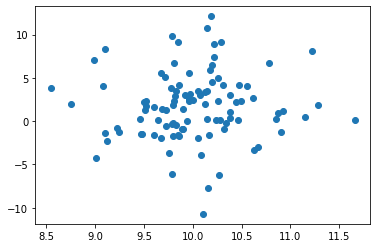

In [17]:
plt.plot(x,y,'o')

------------------------------------------------------------------------

In [18]:
torch.manual_seed(43052)
ones= torch.ones(100)
x,_ = torch.randn(100).sort()
X = torch.stack([ones,x]).T # torch.stack([ones,x],axis=1)
W = torch.tensor([2.5,4])
ϵ = torch.randn(100)*0.5
y = X@W + ϵ

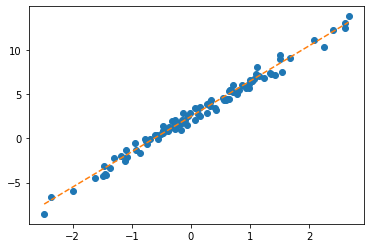

In [19]:
plt.plot(x,y,'o')
plt.plot(x,2.5+4*x,'--')

blue를 observe한 상태에서 orange를 measure함

학습이 된 상태: prediction을 제시할 수 있는 상태

underline function을 아는 상태는 w0와 w1을 아는 상태라고 할 수 있다.

$x_{new}$가 주어졌을때 underline function과 얼마나 떨어져 있나 보면
되니까

## 회귀모형에서 학습이란?

`-` 파란점만 주어졌을때, 주황색 점선을 추정하는것. 좀 더 정확하게 말하면
given data로 $\begin{bmatrix} \hat{w}_0 \\ \hat{w}_1 \end{bmatrix}$를
최대한 $\begin{bmatrix} 2.5 \\ 4 \end{bmatrix}$와 비슷하게 찾는것.

-   given data : $\big\{(x_i,y_i) \big\}_{i=1}^{n}$

-   parameter: ${\bf W}=\begin{bmatrix} w_0 \\ w_1 \end{bmatrix}$

-   estimated parameter:
    ${\bf \hat{W}}=\begin{bmatrix} \hat{w}_0 \\ \hat{w}_1 \end{bmatrix}$

$\hat{y} = x \hat{W}$

`-` 더 쉽게 말하면 아래의 그림을 보고 `적당한` 추세선을 찾는것이다.

적당한?

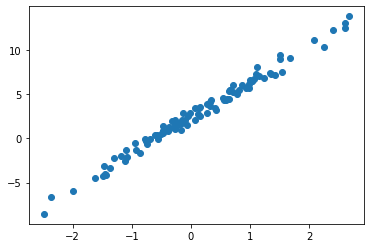

In [20]:
plt.plot(x,y,'o')

`-` 시도: $(\hat{w}_0,\hat{w}_1)=(-5,10)$을 선택하여 선을 그려보고
적당한지 판단.

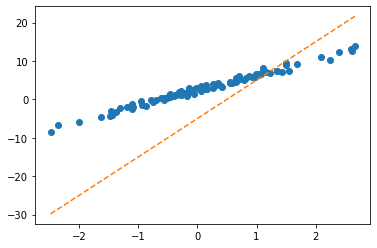

In [21]:
plt.plot(x,y,'o')
plt.plot(x,-5+x*10,'--')

-   $\hat{y}_i=-5 +10 x_i$ 와 같이 $y_i$의 값을 적합시키겠다는 의미

`-` 벡터표현으로 주황색점선을 계산

In [22]:
What = torch.tensor([-5.0,10.0])

In [23]:
X.shape

torch.Size([100, 2])

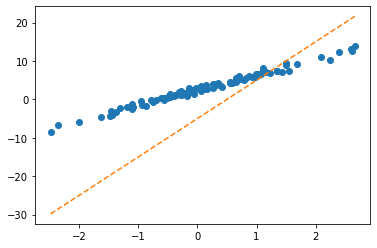

In [24]:
plt.plot(x,y,'o')
plt.plot(x,X@What,'--')

**data를 보고 architecture를 설계하는 modeling과정**

## 파라메터를 학습하는 방법 (적당한 선으로 업데이트 하는 방법)

`-` 이론적으로 추론 \<- 회귀분석시간에 배운것

`-` **컴퓨터의 반복계산을 이용하여 추론 (손실함수도입 + 경사하강법)**
\<- 우리가 오늘 파이토치로 실습해볼 내용.

`-` 전략: 아래와 같은 3단계 전략을 취한다.

-   stage1: 아무 점선이나 그어본다..
-   stage2: stage1에서 그은 점선보다 더 좋은 점선으로 바꾼다.
-   stage3: stage1 - 2 를 반복한다.

### ***Stage1: 첫번째 점선 – 임의의 선을 일단 그어보자***

`-` $\hat{w}_0=-5, \hat{w}_1 = 10$ 으로 설정하고 (왜? 그냥) 임의의 선을
그어보자.

-   처음에는
    ${\bf \hat{W}}=\begin{bmatrix} \hat{w}_0 \\ \hat{w}_1 \end{bmatrix}=\begin{bmatrix} -5 \\ 10 \end{bmatrix}$
    를 대입해서 주황색 점선을 적당히 그려보자는 의미

-   끝에 requires_grad=True는 나중에 미분을 위한 것

In [25]:
What = torch.tensor([-5.0,10.0])
What

tensor([-5., 10.])

tensor에서 tf.variable로 출력할떄롸 같은 결과임

In [26]:
What = torch.tensor([-5.0,10.0],requires_grad=True)
What

tensor([-5., 10.], requires_grad=True)

꼬리표가 생겼다.

In [27]:
What.detach()

tensor([-5., 10.])

In [28]:
What.data

tensor([-5., 10.])

꼬리표가 사라졌다.

꼬리표 있어도 계산은 되지만, matplot에서는 오류..

그려보자!

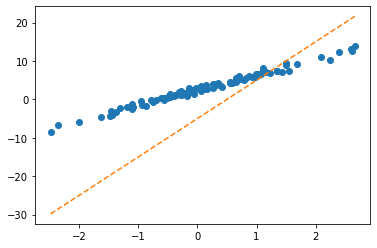

In [29]:
plt.plot(x,y,'o')
plt.plot(x,X@What.data,'--')

### ***Stage2: 첫번째 수정 – 최초의 점선에 대한 ‘적당한 정도’를 판단하고 더 ’적당한’ 점선으로 업데이트 한다.***

`-` ’적당한 정도’를 판단하기 위한 장치: loss function 도입!

$loss=\sum_{i=1}^{n}(y_i-\hat{y}_i)^2=\sum_{i=1}^{n}(y_i-(\hat{w}_0+\hat{w}_1x_i))^2$

$=({\bf y}-{\bf\hat{y}})^\top({\bf y}-{\bf\hat{y}})=({\bf y}-{\bf X}{\bf \hat{W}})^\top({\bf y}-{\bf X}{\bf \hat{W}})$

In [30]:
loss = torch.sum((y - X@What)**2)
loss

tensor(8587.6875, grad_fn=<SumBackward0>)

`-` loss 함수의 특징 - $y_i \approx \hat{y}_i$ 일수록 loss값이 작다. -
$y_i \approx \hat{y}_i$ 이 되도록 $(\hat{w}_0,\hat{w}_1)$을 잘 찍으면
loss값이 작다. - (중요) 주황색 점선이 ‘적당할 수록’ loss값이 작다.

`-` 우리의 목표: 이 loss(=8587.6875)을 더 줄이자. - 궁극적으로는 아예
모든 조합 $(\hat{w}_0,\hat{w}_1)$에 대하여 가장 작은 loss를 찾으면
좋겠다. (stage2에서 할일은 아님)

`-` 문제의 치환: 생각해보니까 우리의 문제는 아래와 같이 수학적으로
단순화 되었다. - 적당해보이는 주황색 선을 찾자 $\to$ $loss(w_0,w_1)$를
최소로하는 $(w_0,w_1)$의 값(정의역 set)을 찾자.

`-` 수정된 목표: $loss(w_0,w_1)$를 최소로 하는 $(w_0,w_1)$을 구하라. -
단순한 수학문제가 되었다. 마치 $loss(w)=w^2-2w+3$ 을 최소화하는 $w$를
찾으라는 것과 같음. - 즉 “적당한 선으로 업데이트 하라 = 파라메터($W$)를
학습 하라 = 손실함수를 최소화 하라”

`-` 우리의 무기: 경사하강법, 벡터미분

------------------------------------------------------------------------

##### ***Stage2를 위한 경사하강법 복습***

**경사하강법 아이디어 (1차원)**

(step 1) 임의의 점을 찍는다.

(step 2) 그 점에서 순간기울기를 구한다. (접선) \<– 미분

(step 3) 순간기울기(=미분계수)의 부호를 살펴보고 부호와 반대방향으로
움직인다.

(팁) 기울기의 절대값 크기와 비례하여 보폭(=움직이는 정도)을 조절한다.

(서연필기) 접선 음수면 오른쪽으로 가고 접선 양수면 왼쪽으로 가쟈~

**경사하강법 아이디어 (2차원)**

(step 1) 임의의 점을 찍는다.

(step 2) 그 점에서 순간기울기를 구한다. (접평면) \<– 편미분

(step 3) 순간기울기(=미분계수)의 부호를 살펴보고 부호와 반대방향으로
각각 움직인다.

(팁) 기울기의 절대값 크기와 비례하여 보폭(=움직이는 정도)을 각각
조절한다.

(서연필기) x,y 다르게 정의하는~편미분

**loss를 줄이도록 ${\bf W}$를 개선하는 방법**

`-` $수정값 \leftarrow 원래값 - 기울어진크기(=미분계수) \times \alpha$

-   여기에서 $\alpha$는 전체적인 보폭의 크기를 결정한다. 즉 $\alpha$값이
    클수록 한번의 update에 움직이는 양이 크다.

`-`
${\bf W} \leftarrow {\bf W} - \alpha \times \frac{\partial}{\partial {\bf W}}loss(w_0,w_1)$

(서연필기) 미분계수 반대로 움직이기 위해 마이너스(-) 취해주자

(서연필기) 알파자체가 음수면 방향이 바뀌니까 양수!

-   마이너스의 의미: 기울기의 부호를 보고 반대방향으로 움직여라.

-   $\frac{\partial}{\partial {\bf W}}loss(w_0,w_1):$ 기울기의 절대값
    크기와 비례하여 움직이는 정도를 조정하라.

-   $\alpha$의 의미: 전체적인 보폭의 속도를 조절, $\alpha$가 크면
    전체적으로 빠르게 움직인다. 다리의 길이로 비유할 수 있다.

------------------------------------------------------------------------

`-` 우리의 목표: loss=8587.6875 인데, 이걸 줄이는 것이 목표라고 했었음.
이것을 줄이는 방법이 경사하강법이다.

`-` 경사하강법으로 loss를 줄이기 위해서는
$\frac{\partial}{\partial {\bf W}}loss(w_0,w_1)$의 계산이 필요한데, 이를
위해서 벡터미분이 필요하다. (`loss.backward()`로 하면된다)

In [31]:
loss

tensor(8587.6875, grad_fn=<SumBackward0>)

In [32]:
What.grad

In [33]:
loss.backward()

In [34]:
What.grad

tensor([-1342.2523,  1188.9307])

(서연필기) What.grad의 결과 값이 생겼다!

In [35]:
loss

tensor(8587.6875, grad_fn=<SumBackward0>)

(서연필기) loss 계산할때 What에있는 꼬리표가 따라와서 loss에도 꼬리표가
붙었다.

-   loss.backward()의 의미: loss를 미분해라! 뭘로?
    `requires_grad=True`를 가진 텐서로!!

-   

``` python
loss=torch.sum((y-yhat)**2)= torch.sum((y-X@What)**2)
# 이었고 
What=torch.tensor([-5.0,10.0],requires_grad=True)
# 이므로 결국 What으로 미분하라는 의미. 
# 미분한 식이 나오는 것이 아니고, 
# 그 식에 (-5.0, 10.0)을 대입한 계수값이 계산됨. 
```

`-` 위에서 `loss.backward()`의 과정은 미분을 활용하여 $(-5,10)$에서의
순간기울기를 구했다는 의미임.

In [36]:
What,What.grad

(tensor([-5., 10.], requires_grad=True), tensor([-1342.2523,  1188.9307]))

`-` (-5,10)에서 loss의 순간기울기 값은 `What.grad`로 확인가능하다.

-   이것이 의미하는건 $(-5,10)$에서의 $loss(w_0,w_1)$의 순간기울기가
    $(-1342.2523, 1188.9307)$ 이라는 의미

`-` (확인1) `loss.backward()`가 미분을 잘 계산해 주는 것이 맞는가?
손계산으로 검증하여 보자.

-   $loss(w_0,w_1)=({\bf y}-\hat{\bf y})^\top ({\bf y}-\hat{\bf y})=({\bf y}-{\bf XW})^\top ({\bf y}-{\bf XW})$

-   $\frac{\partial}{\partial {\bf W} }loss(w_0,w_1)=-2{\bf X}^\top {\bf y}+2{\bf X}^\top {\bf X W}$

In [37]:
- 2 * X.T @ y + 2 * X.T @ X @ What

tensor([-1342.2522,  1188.9305], grad_fn=<AddBackward0>)

`-` (확인2) `loss.backward()`가 미분을 잘 계산해 주는 것이 맞는가?
편미분을 간단히 구현하여 검증하여 보자.

-   $\frac{\partial}{\partial {\bf W} } loss(w_0,w_1)=\begin{bmatrix}\frac{\partial}{\partial w_0} \\ \frac{\partial}{\partial w_1} \end{bmatrix}loss(w_0,w_1) =\begin{bmatrix}\frac{\partial}{\partial w_0}loss(w_0,w_1) \\ \frac{\partial}{\partial w_1}loss(w_0,w_1) \end{bmatrix}$

-   $\frac{\partial}{\partial w_0}loss(w_0,w_1) \approx \frac{loss(w_0+h,w_1)-loss(w_0,w_1)}{h}$

-   $\frac{\partial}{\partial w_1}loss(w_0,w_1) \approx \frac{loss(w_0,w_1+h)-loss(w_0,w_1)}{h}$

스칼라일때

``` python
h = 0.01
(loss(w+h) - loss(w)) / h
```

In [38]:
_lossfn = lambda w0,w1: torch.sum((y-w0-w1*x)**2)
_lossfn(-5,10)

tensor(8587.6875)

In [39]:
h=0.001
(_lossfn(-5+h,10) - _lossfn(-5,10))/h,  (_lossfn(-5,10+h) - _lossfn(-5,10))/h

(tensor(-1341.7968), tensor(1190.4297))

-5,10에서의 편미분한 순간기울기

-   약간 오차가 있지만 얼추비슷 $\to$ 잘 계산했다는 소리임

(서연필기) 꼭 정확하진 않지!

`-` 수정전, 수정하는폭, 수정후의 값은 차례로 아래와 같다.

In [40]:
alpha=0.001 
print('수정전: ' + str(What.data)) # What 에서 미분꼬리표를 떼고 싶다면? What.data or What.detach()
print('수정하는폭: ' +str(-alpha * What.grad))
print('수정후: ' +str(What.data-alpha * What.grad))
print('*참값: (2.5,4)' )

수정전: tensor([-5., 10.])
수정하는폭: tensor([ 1.3423, -1.1889])
수정후: tensor([-3.6577,  8.8111])
*참값: (2.5,4)

`-` Wbefore, Wafter 계산

In [41]:
Wbefore = What.data
Wafter = What.data- alpha * What.grad
Wbefore, Wafter

(tensor([-5., 10.]), tensor([-3.6577,  8.8111]))

data쓰는지 grad 쓰는지 명확히

`-` Wbefore, Wafter의 시각화

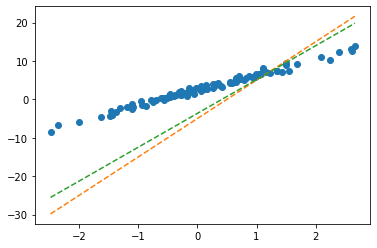

In [42]:
plt.plot(x,y,'o')
plt.plot(x,X@Wbefore,'--')
plt.plot(x,X@Wafter,'--')

### ***Stage3: Learn (=estimate $\bf\hat{W})$***

`-` 이 과정은 Stage1,2를 반복하면 된다.

In [43]:
What= torch.tensor([-5.0,10.0],requires_grad=True) #

In [44]:
alpha=0.001 
for epoc in range(30): ## 30번 반복합니다!! 
    yhat=X@What 
    loss=torch.sum((y-yhat)**2)
    loss.backward() 
    What.data = What.data-alpha * What.grad
    What.grad=None

(서연필기) **What.grad=None 해주는 이유는 grad가 미분을 누적하기 때문에
막아주기 위해서**

-   원래 철자는 epoch이 맞아요

`-` 반복결과는?! (최종적으로 구해지는 What의 값은?!) - 참고로 true

In [45]:
What.data ## true인 (2.5,4)와 상당히 비슷함

tensor([2.4290, 4.0144])

`-` 반복결과를 시각화하면?

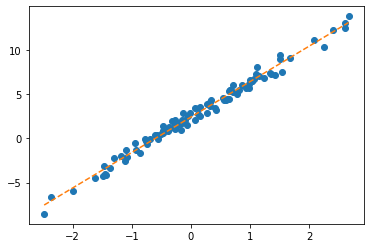

In [46]:
plt.plot(x,y,'o')
plt.plot(x,X@What.data,'--')

## 파라메터의 학습과정 음미 (학습과정 모니터링)

### 학습과정의 기록

`-` 기록을 해보자.

In [47]:
loss_history = [] # 기록하고 싶은것 1  
yhat_history = [] # 기록하고 싶은것 2 
What_history = [] # 기록하고 싶은것 3 

In [48]:
What= torch.tensor([-5.0,10.0],requires_grad=True)
alpha=0.001 
for epoc in range(30): 
    yhat=X@What ; yhat_history.append(yhat.data.tolist())
    loss=torch.sum((y-yhat)**2); loss_history.append(loss.item())
    loss.backward() 
    What.data = What.data-alpha * What.grad; What_history.append(What.detach().tolist())
    What.grad=None

(서연필기) list 그대로 받으니까 꼬리표 삭제

`-` $\hat{y}$ 관찰 (epoch=3, epoch=10, epoch=15)

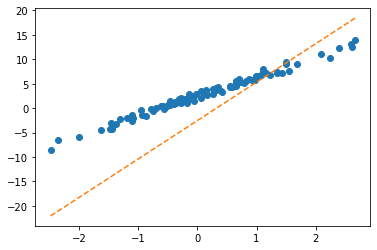

In [49]:
plt.plot(x,y,'o')
plt.plot(x,yhat_history[2],'--')

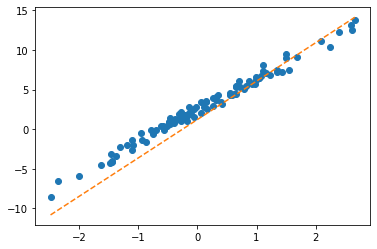

In [50]:
plt.plot(x,y,'o')
plt.plot(x,yhat_history[9],'--')

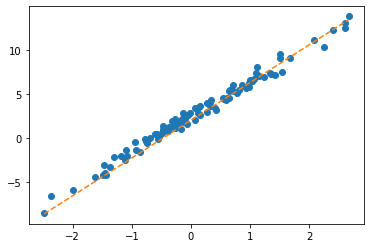

In [51]:
plt.plot(x,y,'o')
plt.plot(x,yhat_history[14],'--')

In [52]:
len(yhat_history[0])

100

`-` $\hat{\bf W}$ 관찰

In [53]:
What_history

[[-3.657747745513916, 8.81106948852539],
 [-2.554811716079712, 7.861191749572754],
 [-1.649186372756958, 7.101552963256836],
 [-0.9060714244842529, 6.49347448348999],
 [-0.29667866230010986, 6.006272315979004],
 [0.2027742564678192, 5.615575313568115],
 [0.6119104623794556, 5.302003383636475],
 [0.9469034671783447, 5.050129413604736],
 [1.2210699319839478, 4.847657680511475],
 [1.4453645944595337, 4.684779167175293],
 [1.6287915706634521, 4.553659439086914],
 [1.778746247291565, 4.448036193847656],
 [1.90129816532135, 4.3628973960876465],
 [2.0014259815216064, 4.294229507446289],
 [2.0832109451293945, 4.238814353942871],
 [2.149996757507324, 4.194070339202881],
 [2.204521894454956, 4.157923698425293],
 [2.249027729034424, 4.128708839416504],
 [2.285348415374756, 4.105085849761963],
 [2.31498384475708, 4.0859761238098145],
 [2.339160442352295, 4.070511341094971],
 [2.3588807582855225, 4.057991027832031],
 [2.3749637603759766, 4.0478515625],
 [2.3880786895751953, 4.039637088775635],
 [2.

`-` loss 관찰

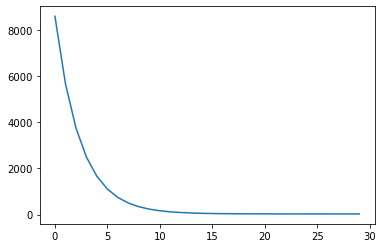

In [54]:
plt.plot(loss_history)

### 학습과정을 animation으로 시각화

In [55]:
from matplotlib import animation

In [56]:
plt.rcParams['figure.figsize'] = (7.5,2.5)
plt.rcParams["animation.html"] = "jshtml" 

`-` 왼쪽에는 $(x_i,y_i)$ and $(x_i,\hat{y}_i)$ 을 그리고 오른쪽에는
$loss(w_0,w_1)$ 을 그릴것임

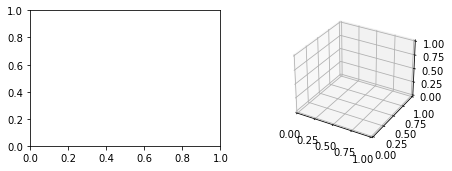

In [57]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

`-` 왼쪽그림!

In [58]:
ax1.plot(x,y,'o')
line, = ax1.plot(x,yhat_history[0]) # 나중에 애니메이션 할때 필요해요..

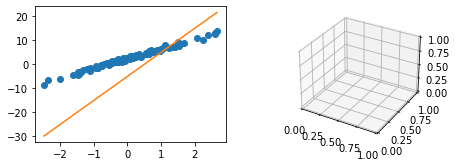

In [59]:
fig

`-` 오른쪽 그림1: $loss(w_0,w_1)$

In [60]:
_w0 = np.arange(-6, 11, 0.5) ## 파란색곡면을 그리는 코드 (시작) 
_w1 = np.arange(-6, 11, 0.5)
w1,w0 = np.meshgrid(_w1,_w0)
lss=w0*0
for i in range(len(_w0)):
    for j in range(len(_w1)):
        lss[i,j]=torch.sum((y-_w0[i]-_w1[j]*x)**2)
ax2.plot_surface(w0, w1, lss, rstride=1, cstride=1, color='b',alpha=0.35) ## 파란색곡면을 그리는 코드(끝) 
ax2.azim = 40  ## 3d plot의 view 조절 
ax2.dist = 8   ## 3d plot의 view 조절 
ax2.elev = 5   ## 3d plot의 view 조절 

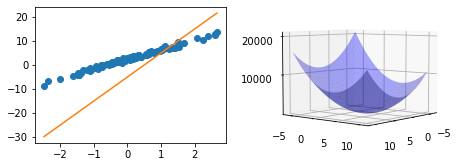

In [61]:
fig

`-` 오른쪽 그림2: $(w_0,w_1)=(2.5,4)$ 와 $loss(2.5,4)$ 값 \<- loss
함수가 최소가 되는 값 (이거 진짜야? ㅋㅋ)

In [62]:
ax2.scatter(2.5,4,torch.sum((y-2.5-4*x)**2),s=200,color='red',marker='*') ## 최소점을 표시하는 코드 (붉은색 별) 

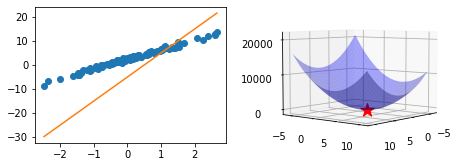

In [63]:
fig

`-` 오른쪽 그림3: $(w_0,w_1)=(-3.66, 8.81)$ 와 $loss(-3.66,8.81)$ 값

In [64]:
What_history[0]

[-3.657747745513916, 8.81106948852539]

In [65]:
ax2.scatter(What_history[0][0],What_history[0][1],loss_history[0],color='grey') ## 업데이트되는 What을 표시하는 점 (파란색 동그라미) 

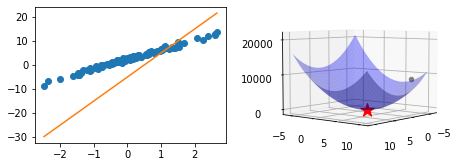

In [66]:
fig

`-` 애니메이션

In [67]:
def animate(epoc):
    line.set_ydata(yhat_history[epoc])
    ax2.scatter(What_history[epoc][0],What_history[epoc][1],loss_history[epoc],color='grey')
    return line

ani = animation.FuncAnimation(fig, animate, frames=30)
plt.close()
ani

Once 
 
 Loop 
 
 Reflect

`-` 함수로 만들자..

In [68]:
def show_lrpr(data,history):
    x,y = data 
    loss_history,yhat_history,What_history = history 
    
    fig = plt.figure()
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')

    ## ax1: 왼쪽그림 
    ax1.plot(x,y,'o')
    line, = ax1.plot(x,yhat_history[0]) 
    ## ax2: 오른쪽그림 
    _w0 = np.arange(-6, 11, 0.5) ## 파란색곡면을 그리는 코드 (시작) 
    _w1 = np.arange(-6, 11, 0.5)
    w1,w0 = np.meshgrid(_w1,_w0)
    lss=w0*0
    for i in range(len(_w0)):
        for j in range(len(_w1)):
            lss[i,j]=torch.sum((y-_w0[i]-_w1[j]*x)**2)
    ax2.plot_surface(w0, w1, lss, rstride=1, cstride=1, color='b',alpha=0.35) ## 파란색곡면을 그리는 코드(끝) 
    ax2.scatter(2.5,4,torch.sum((y-2.5-4*x)**2),s=200,color='red',marker='*') ## 최소점을 표시하는 코드 (붉은색 별) 
    ax2.scatter(What_history[0][0],What_history[0][1],loss_history[0],color='b') ## 업데이트되는 What을 표시하는 점 (파란색 동그라미) 
    ax2.azim = 40  ## 3d plot의 view 조절 
    ax2.dist = 8   ## 3d plot의 view 조절 
    ax2.elev = 5   ## 3d plot의 view 조절 

    def animate(epoc):
        line.set_ydata(yhat_history[epoc])
        ax2.scatter(np.array(What_history)[epoc,0],np.array(What_history)[epoc,1],loss_history[epoc],color='grey')
        return line

    ani = animation.FuncAnimation(fig, animate, frames=30)
    plt.close()
    return ani

In [69]:
show_lrpr([x,y],[loss_history,yhat_history,What_history])

Once 
 
 Loop 
 
 Reflect

(서연필기) 알파의 정도에 따라 학습 속도가 달라져..

## $\alpha$에 대하여 ($\alpha$는 학습률)

### (1) $\alpha=0.0001$: $\alpha$ 가 너무 작다면? $\to$ 비효율적이다.

In [70]:
loss_history = [] # 기록하고 싶은것 1  
yhat_history = [] # 기록하고 싶은것 2 
What_history = [] # 기록하고 싶은것 3 

In [71]:
What= torch.tensor([-5.0,10.0],requires_grad=True)
alpha=0.0001 
for epoc in range(30): 
    yhat=X@What ; yhat_history.append(yhat.data.tolist())
    loss=torch.sum((y-yhat)**2); loss_history.append(loss.item())
    loss.backward() 
    What.data = What.data-alpha * What.grad; What_history.append(What.data.tolist())
    What.grad=None

In [72]:
show_lrpr([x,y],[loss_history,yhat_history,What_history])

Once 
 
 Loop 
 
 Reflect

### (2) $\alpha=0.0083$: $\alpha$가 너무 크다면? $\to$ 다른의미에서 비효율적이다 + 위험하다..

In [73]:
loss_history = [] # 기록하고 싶은것 1  
yhat_history = [] # 기록하고 싶은것 2 
What_history = [] # 기록하고 싶은것 3 

In [74]:
What= torch.tensor([-5.0,10.0],requires_grad=True)
alpha=0.0083
for epoc in range(30): 
    yhat=X@What ; yhat_history.append(yhat.data.tolist())
    loss=torch.sum((y-yhat)**2); loss_history.append(loss.item())
    loss.backward() 
    What.data = What.data-alpha * What.grad; What_history.append(What.data.tolist())
    What.grad=None

In [75]:
show_lrpr([x,y],[loss_history,yhat_history,What_history])

Once 
 
 Loop 
 
 Reflect

### (3) $\alpha=0.0085$

In [76]:
loss_history = [] # 기록하고 싶은것 1  
yhat_history = [] # 기록하고 싶은것 2 
What_history = [] # 기록하고 싶은것 3 

In [77]:
What= torch.tensor([-5.0,10.0],requires_grad=True)
alpha=0.0085
for epoc in range(30): 
    yhat=X@What ; yhat_history.append(yhat.data.tolist())
    loss=torch.sum((y-yhat)**2); loss_history.append(loss.item())
    loss.backward() 
    What.data = What.data-alpha * What.grad.data; What_history.append(What.data.tolist())
    What.grad=None

In [78]:
show_lrpr([x,y],[loss_history,yhat_history,What_history])

Once 
 
 Loop 
 
 Reflect

(서연필기) 최솟값보다 오히려 커지는 경향이 나와버림

### (4) $\alpha=0.01$

In [79]:
loss_history = [] # 기록하고 싶은것 1  
yhat_history = [] # 기록하고 싶은것 2 
What_history = [] # 기록하고 싶은것 3 

In [80]:
What= torch.tensor([-5.0,10.0],requires_grad=True)
alpha=0.01
for epoc in range(30): 
    yhat=X@What ; yhat_history.append(yhat.data.tolist())
    loss=torch.sum((y-yhat)**2); loss_history.append(loss.item())
    loss.backward() 
    What.data = What.data-alpha * What.grad; What_history.append(What.data.tolist())
    What.grad=None

In [81]:
show_lrpr([x,y],[loss_history,yhat_history,What_history])

Once 
 
 Loop 
 
 Reflect

## [숙제](https://ieilms.jbnu.ac.kr/)

`-` 학습률($\alpha$)를 조정하며 실습해보고 스크린샷 제출

### (1) $\alpha=0.0015$

In [94]:
loss_history = [] # 기록하고 싶은것 1  
yhat_history = [] # 기록하고 싶은것 2 
What_history = [] # 기록하고 싶은것 3 

In [95]:
What= torch.tensor([-5.0,10.0],requires_grad=True)
alpha=0.015
for epoc in range(30): 
    yhat=X@What ; yhat_history.append(yhat.data.tolist())
    loss=torch.sum((y-yhat)**2); loss_history.append(loss.item())
    loss.backward() 
    What.data = What.data-alpha * What.grad; What_history.append(What.data.tolist())
    What.grad=None

In [96]:
show_lrpr([x,y],[loss_history,yhat_history,What_history])

Once 
 
 Loop 
 
 Reflect

### (2) $\alpha=0.0038$

In [103]:
loss_history = [] # 기록하고 싶은것 1  
yhat_history = [] # 기록하고 싶은것 2 
What_history = [] # 기록하고 싶은것 3 

In [104]:
What= torch.tensor([-5.0,10.0],requires_grad=True)
alpha=0.0038
for epoc in range(30): 
    yhat=X@What ; yhat_history.append(yhat.data.tolist())
    loss=torch.sum((y-yhat)**2); loss_history.append(loss.item())
    loss.backward() 
    What.data = What.data-alpha * What.grad; What_history.append(What.data.tolist())
    What.grad=None

In [105]:
show_lrpr([x,y],[loss_history,yhat_history,What_history])

Once 
 
 Loop 
 
 Reflect